In [1]:
import pandas as pd
import numpy as np
import neattext as nt
import neattext.functions as nfx
import string
import text2emotion as te
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import math
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.mixture import GaussianMixture
from plotnine import *
from sklearn.metrics import silhouette_score
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("Test2.csv", encoding = 'utf-8', error_bad_lines= False)

In [3]:
df

,clean_text,Happy,Angry,Surprise,Sad,Fear
0,ni air starbuck rahsia dari barista drop secre...,0.00,0.0,1.00,0.00,0.00
1,brewdog trending awful practicesnna reminder s...,0.00,0.0,1.00,0.00,0.00
2,secret recipe progress devotional june 10 prog...,0.00,0.0,0.50,0.00,0.50
3,brewdog trending awful practicesnna reminder s...,0.00,0.0,1.00,0.00,0.00
4,new secret 16 food recipes teleport liyue harb...,0.00,0.0,0.50,0.00,0.50
...,...,...,...,...,...,...
3013,awwwww secret recipe,0.00,0.0,1.00,0.00,0.00
3014,harshit makes excellent point when read articl...,0.25,0.0,0.25,0.25,0.25
3015,released secret recipe fleets,0.00,0.0,1.00,0.00,0.00
3016,great recipe post please consider sponsoring,0.33,0.0,0.00,0.67,0.00


In [4]:
df['clean_text'] = df['clean_text'].apply(lambda x: nfx.remove_custom_pattern(x, term_pattern=r'Secret Recipe')) 

In [5]:
df['clean_text'] = df['clean_text'].apply(lambda x: nfx.remove_custom_pattern(x, term_pattern=r'secret recipe'))

In [6]:
df

,clean_text,Happy,Angry,Surprise,Sad,Fear
0,ni air starbuck rahsia dari barista drop sta...,0.00,0.0,1.00,0.00,0.00
1,brewdog trending awful practicesnna reminder,0.00,0.0,1.00,0.00,0.00
2,progress devotional june 10 progress consist...,0.00,0.0,0.50,0.00,0.50
3,brewdog trending awful practicesnna reminder,0.00,0.0,1.00,0.00,0.00
4,new secret 16 food recipes teleport liyue harb...,0.00,0.0,0.50,0.00,0.50
...,...,...,...,...,...,...
3013,awwwww,0.00,0.0,1.00,0.00,0.00
3014,harshit makes excellent point when read articl...,0.25,0.0,0.25,0.25,0.25
3015,released fleets,0.00,0.0,1.00,0.00,0.00
3016,great recipe post please consider sponsoring,0.33,0.0,0.00,0.67,0.00


In [7]:
def getTextEmotion(txt):
    return te.get_emotion(txt)

In [8]:
x = df['clean_text'].apply(getTextEmotion)

In [9]:
x

0       {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
1       {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
2       {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
3       {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
4       {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...
                              ...                        
3013    {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
3014    {'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25...
3015    {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
3016    {'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...
3017    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ...
Name: clean_text, Length: 3018, dtype: object

In [10]:
x.to_csv('Test4.csv', header=True, index=False, encoding='utf-8-sig')

In [2]:
x = pd.read_csv("Test4.csv", encoding = 'utf-8', error_bad_lines = False)

In [3]:
x

,Happy,Angry,Surprise,Sad,Fear
0,0.00,0.0,0.00,0.00,0.00
1,0.00,0.0,0.00,0.00,0.00
2,0.00,0.0,0.00,0.00,1.00
3,0.00,0.0,0.00,0.00,0.00
4,0.00,0.0,0.50,0.00,0.50
...,...,...,...,...,...
3013,0.00,0.0,0.00,0.00,0.00
3014,0.25,0.0,0.25,0.25,0.25
3015,0.00,0.0,0.00,0.00,0.00
3016,0.33,0.0,0.00,0.67,0.00


In [34]:
x.clean_text.str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9
0,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
1,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
2,{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0}
3,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
4,{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.5,",'Sad':,"0.0,",'Fear':,0.5}
...,...,...,...,...,...,...,...,...,...,...
3013,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
3014,{'Happy':,"0.25,",'Angry':,"0.0,",'Surprise':,"0.25,",'Sad':,"0.25,",'Fear':,0.25}
3015,{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
3016,{'Happy':,"0.33,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.67,",'Fear':,0.0}


In [35]:
x[['Happy_Text','Happy_Value', 'Angry_Text', 'Angry_Value', 
    'Surprise_Text', 'Surprise_Value', 'Sad_Text', 'Sad_Value', 
    'Fear_Text', 'Fear_Value']] = x.clean_text.str.split(" ",expand=True)
x

,clean_text,Happy_Text,Happy_Value,Angry_Text,Angry_Value,Surprise_Text,Surprise_Value,Sad_Text,Sad_Value,Fear_Text,Fear_Value
0,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
1,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
2,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0}
3,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
4,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.5,",'Sad':,"0.0,",'Fear':,0.5}
...,...,...,...,...,...,...,...,...,...,...,...
3013,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
3014,"{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25...",{'Happy':,"0.25,",'Angry':,"0.0,",'Surprise':,"0.25,",'Sad':,"0.25,",'Fear':,0.25}
3015,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0}
3016,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",{'Happy':,"0.33,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.67,",'Fear':,0.0}


In [36]:
#Clean symbol
x['Happy'] = x['Happy_Value'].str.replace(",", " ")
x['Angry'] = x['Angry_Value'].str.replace(",", " ")
x['Surprise'] = x['Surprise_Value'].str.replace(",", " ")
x['Sad'] = x['Sad_Value'].str.replace(",", " ")
x['Fear'] = x['Fear_Value'].str.replace("}", " ")
x

<ipython-input-36-588fce2264d4>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,clean_text,Happy_Text,Happy_Value,Angry_Text,Angry_Value,Surprise_Text,Surprise_Value,Sad_Text,Sad_Value,Fear_Text,Fear_Value,Happy,Angry,Surprise,Sad,Fear
0,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
1,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
2,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.0,",'Fear':,1.0},0.0,0.0,0.0,0.0,1.0
3,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
4,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, ...",{'Happy':,"0.0,",'Angry':,"0.0,",'Surprise':,"0.5,",'Sad':,"0.0,",'Fear':,0.5},0.0,0.0,0.5,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
3014,"{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25...",{'Happy':,"0.25,",'Angry':,"0.0,",'Surprise':,"0.25,",'Sad':,"0.25,",'Fear':,0.25},0.25,0.0,0.25,0.25,0.25
3015,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",{'Happy':,"0,",'Angry':,"0,",'Surprise':,"0,",'Sad':,"0,",'Fear':,0},0,0,0,0,0
3016,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0,...",{'Happy':,"0.33,",'Angry':,"0.0,",'Surprise':,"0.0,",'Sad':,"0.67,",'Fear':,0.0},0.33,0.0,0.0,0.67,0.0


In [37]:
x = x[['Happy','Angry','Surprise','Sad','Fear']]

In [9]:
x1 = pd.read_csv("Test2.csv", encoding = 'utf-8', error_bad_lines= False)
x1 = x1[['Happy','Angry', 'Surprise', 'Sad', 'Fear']]

In [10]:
x

,Happy,Angry,Surprise,Sad,Fear
0,0,0,0,0,0
1,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0
4,0.0,0.0,0.5,0.0,0.5
...,...,...,...,...,...
3013,0,0,0,0,0
3014,0.25,0.0,0.25,0.25,0.25
3015,0,0,0,0,0
3016,0.33,0.0,0.0,0.67,0.0


In [11]:
x1

,Happy,Angry,Surprise,Sad,Fear
0,0.00,0.0,1.00,0.00,0.00
1,0.00,0.0,1.00,0.00,0.00
2,0.00,0.0,0.50,0.00,0.50
3,0.00,0.0,1.00,0.00,0.00
4,0.00,0.0,0.50,0.00,0.50
...,...,...,...,...,...
3013,0.00,0.0,1.00,0.00,0.00
3014,0.25,0.0,0.25,0.25,0.25
3015,0.00,0.0,1.00,0.00,0.00
3016,0.33,0.0,0.00,0.67,0.00


In [4]:
# Create a multivariate Gaussian distribution instance with 2 clusters: model
gmm = GaussianMixture(n_components=2)

# Fit model to points
gmm.fit(x)

# Determine the cluster labels of new_points: labels
label = gmm.fit_predict(x)

In [5]:
label

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [20]:
df = pd.DataFrame(data=label)
print(df)
df.to_csv("Test5.csv", header=True, index=False, encoding='utf-8-sig')

      0
0     0
1     0
2     1
3     0
4     1
...  ..
3013  0
3014  1
3015  0
3016  1
3017  1

[3018 rows x 1 columns]


In [6]:
y = pd.read_csv("Test5.csv", encoding = 'utf-8', error_bad_lines= False)
y

,0
0,1
1,1
2,0
3,1
4,0
...,...
3013,1
3014,0
3015,1
3016,0


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=31)

In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.846
Precision: 1.0
Recall: 0.411
F1 Score: 0.583


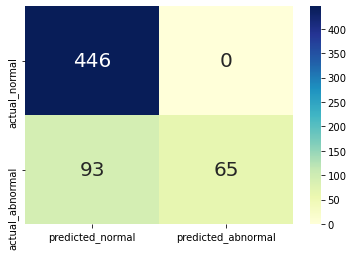

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

NBscore = gnb.score(x_test, y_test)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=31)

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.851
Precision: 0.84
Recall: 1.0
F1 Score: 0.913


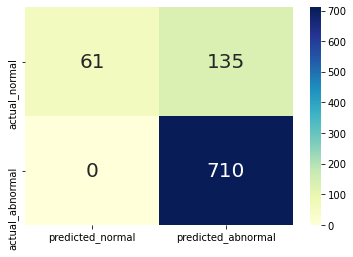

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

NBscore = gnb.score(x_test, y_test)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [11]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.992
Precision: 1.0
Recall: 0.968
F1 Score: 0.984


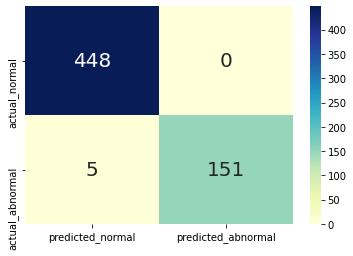

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [14]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.989
Precision: 0.995
Recall: 0.959
F1 Score: 0.977


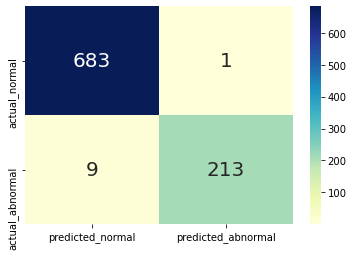

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

# Experiment 2.1

In [25]:
x

,Happy,Angry,Surprise,Sad,Fear
0,0,0,0,0,0
1,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0
4,0.0,0.0,0.5,0.0,0.5
...,...,...,...,...,...
3013,0,0,0,0,0
3014,0.25,0.0,0.25,0.25,0.25
3015,0,0,0,0,0
3016,0.33,0.0,0.0,0.67,0.0


In [40]:
#Remove certain rows
L = ['Happy','Angry','Surprise','Sad','Fear']
z = x[x[L].ne(x[L[0]], axis=0).any(axis=1)]

In [41]:
z

,Happy,Angry,Surprise,Sad,Fear
2,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.5,0.0,0.5
5,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.5,0.0,0.5
...,...,...,...,...,...
3011,0.0,0.0,0.5,0.0,0.5
3012,0.0,0.0,1.0,0.0,0.0
3014,0.25,0.0,0.25,0.25,0.25
3016,0.33,0.0,0.0,0.67,0.0


In [43]:
# Create a multivariate Gaussian distribution instance with 2 clusters: model
gmm = GaussianMixture(n_components=2)

# Fit model to points
gmm.fit(z)

# Determine the cluster labels of new_points: labels
label = gmm.fit_predict(z)

In [50]:
label

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [51]:
df = pd.DataFrame(data=label)
print(df)
df.to_csv("Test5.5.csv", header=True, index=False, encoding='utf-8-sig')

      0
0     1
1     1
2     1
3     1
4     1
...  ..
2522  1
2523  1
2524  1
2525  1
2526  1

[2527 rows x 1 columns]


In [52]:
y = pd.read_csv("Test5.5.csv", encoding = 'utf-8', error_bad_lines= False)
y

,Anomaly
0,1
1,1
2,1
3,1
4,1
...,...
2522,1
2523,1
2524,1
2525,1


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.3, random_state=31)

In [54]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.929
Precision: 0.914
Recall: 1.0
F1 Score: 0.955


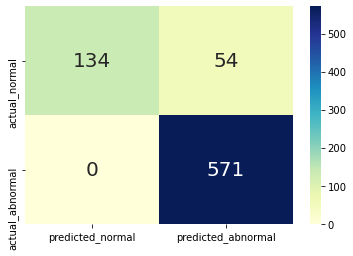

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_normal', 'predicted_abnormal'], yticklabels=['actual_normal', 'actual_abnormal'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

NBscore = gnb.score(x_test, y_test)